In [1]:
#-*- coding: utf-8 -*-
#%load_ext signature
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from geonamescache import GeonamesCache
#from helpers import slug
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap

from sklearn.cluster import Birch    
from sklearn.cluster import KMeans   
#zhfont_kai = matplotlib.font_manager.FontProperties(fname='C:\Windows\Fonts\simkai.ttf')
#zhfont_song = matplotlib.font_manager.FontProperties(fname='C:\Windows\Fonts\simsun.ttc')
#定义使用的汉字字体（楷，宋）

file = 'E:\\SDYP\\graduate\\Paper1\\数据图片\\Python_PaperUseMapW.xls'
shapefile = 'E:\\SDYP\\data\\boundry\\1use_boundry\\10m_admin_0_countries(finalUse)'
num_colors = 5
year = 'Mean'  #选择年单年
cols = ['FID', 'Country Code','Population（万人）','SUM(gC/m2)','SRH(gC/m2)',
        'POPC(gC/m2)','LIVEC(gC/m2)','SRH(%)','POPC(%)','LIVEC(%)']

#设定ISO3code
gc = GeonamesCache()
iso3_codes = list(gc.get_dataset_by_key(gc.get_countries(), 'iso3').keys())

################################选择指标###############################
########-单年选择-#######
basic = pd.read_excel(file,'WORLD') 
df = pd.read_excel(file,'WORLD') 
xlsx = df[['FID','Country Code',cols[9]]] 

#######设置用于出图的数据（fid,Country Code,year/meary Data）
ChangeData1=basic['FID']
ChangeData1=ChangeData1.astype(object)
xlsx = pd.concat([ChangeData1,basic['Country Code'],xlsx.iloc[:,2]],axis=1 )

xlsx.set_index('Country Code', inplace=True)
xlsx = xlsx.ix[iso3_codes].dropna() # Filter out non-countries and missing values.
#xlsx



#########--设置color分类（每一类数值赋值一个bin值）--##########
values = xlsx.iloc[:,1].values
cm = plt.get_cmap('Greens') #比重
#cm = plt.get_cmap('Blues') #其他指标
scheme = [cm(i / num_colors) for i in range(num_colors)]
#bins = np.linspace(values.min(), values.max(), num_colors)

#bins = np.array([0,1000,5000,10000,20000,values.max()+1])  #population
#bins = np.array([0,100,200,400,600,values.max()+1])  #SUM
#bins = np.array([0,200,400,600,800,values.max()+1])  #RH
#bins = np.array([0,10,20,30,40,values.max()+1])  #POP
#bins = np.array([0,10,20,30,50,values.max()+1])  #LIVE
#bins = np.array([0,60,70,80,90,values.max()+1])  #RHP
bins = np.array([0,1,2,5,10,values.max()+1])  #HP
xlsx['bin'] = np.digitize(values, bins) - 1
#xlsx.sort_values('bin', ascending=False).head(10)
#xlsx

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


C:\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


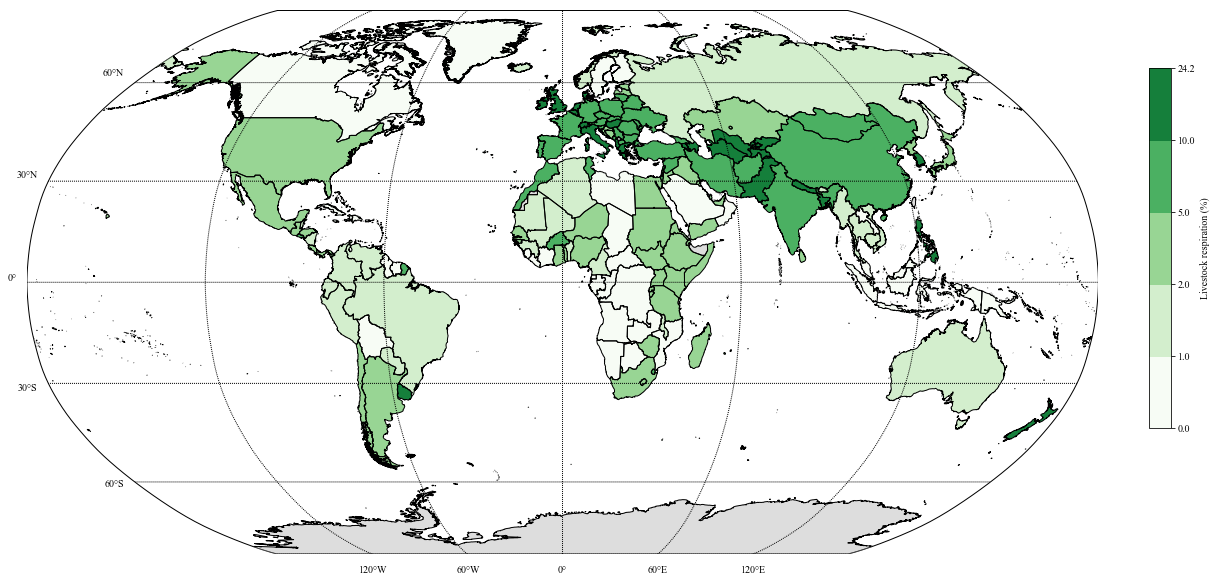

In [2]:
########--地图设置--##########
#mpl.style.use('classic')
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, axisbg='w', frame_on=False)

#indic = 'the proportion of soil heterotrophic respiration' #设置输出指标
#Population   Heterotrophic respiration  Soil heterotrophic respiration 
#Human respiration  Livestock respiration the proportion of SRH
#fig.suptitle('The spatial distribution of {0} {1} {2}'.format(indic,'in','1960-2014'),
#             fontsize=30,x=0.5,y=0.95) #用于5年平均
#fig.suptitle('a',
#             fontsize=30,x=0,y=1) #用于5年平均
m = Basemap(lon_0=0, projection='robin')
m.drawmapboundary(color='w')
m.readshapefile(shapefile, 'units', color='black', linewidth=1)

parallels = np.arange(-90.,90,30.) 
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=20,fontproperties='Times New Roman') # 绘制纬线
meridians = np.arange(-120.,180.,60.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=20,fontproperties='Times New Roman') # 绘制经线
m.drawmapboundary(color='black')

for info, shape in zip(m.units_info, m.units):
    iso3 = info['iso_a3']
    if iso3 not in xlsx.index:
        color = '#dddddd'
    else:
        color = scheme[xlsx.ix[iso3]['bin']]

    patches = [Polygon(np.array(shape), True)]
    pc = PatchCollection(patches)
    pc.set_facecolor(color)
    ax.add_collection(pc)

# Cover up Antarctica so legend can be placed over it.
#ax.axhspan(0, 1000 * 1800, facecolor='w', edgecolor='w', zorder=2)
#plt.text(0, 0, "a", size = 20) 
# Draw color legend.
ax_legend = fig.add_axes([0.92, 0.3, 0.015, 0.5], zorder=4)
cmap = mpl.colors.ListedColormap(scheme)

boundaries = np.array([0,1,2,3,4,5])  #NPP
cb = mpl.colorbar.ColorbarBase(ax_legend,cmap=cmap,boundaries=boundaries, orientation='vertical')
bins2 = bins = np.array([0,1,2,5,10,values.max()])  ###每次需要随指标变化
cb.ax.set_yticklabels([str(round(i, 1)) for i in bins2],fontsize=20,fontproperties='Times New Roman');
cb.set_label('Livestock respiration (%)',fontsize=20,fontproperties='Times New Roman')
#Population(10 thousands)  Soil heterotrophic respiration(g C/m^2)
#Human respiration(g C/m^2) Livestock respiration(g C $m^{-2}$ $yr^{-1}$)


In [ ]:
fig.savefig('LivestockRespiration (%).png',dpi=300)